![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# All Labs Days16 -18. 01-03 -02-2021

#### Scroll down to see all

## Context of LAB

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


## 01-02-21. Day 16. Lab 1 | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

Instructions:
Q1) Import the necessary libraries.

Q2) Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

Q3) First look at its main features (head, shape, info).

Q4) Rename the columns so they follow the PE8 (snake case).

Q5) Change effective to date column to datetime format.

Q6) Check NaN values per column.

Q7) Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

Q8) For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Q9) Get categorical features.

Q10) What should we do with the customer_id column?

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

import datetime

In [2]:
#Q1) Import the necessary libraries.

#Q2) Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
customer_df = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/16_Python.MissingData_DataCleaning_RegExp/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Q3) First look at its main features (head, shape, info)

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Q4) Rename the columns so they follow the PE8 (snake case).
- lowercase & remove spaces

In [7]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
customer_df.columns.values

array(['customer', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employmentstatus',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class',
       'vehicle_size'], dtype=object)

In [9]:
#Q5) Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df['effective_to_date'][0].strftime(format='%d/%m/%Y')

'24/02/2011'

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [11]:
### Q6) Check NaN values per column.
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
customer_df['state'].unique() 

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [13]:
customer_df['customer_lifetime_value'].unique() 

array([ 2763.519279,  6979.535903, 12887.43165 , ...,  8163.890428,
        7524.442436,  2611.836866])

In [14]:
customer_df['income'].unique() 

array([56274,     0, 48767, ..., 66367, 71941, 21941], dtype=int64)

### Q10) What should we do with the customer_id column?

In [15]:
customer_df = customer_df.rename(columns={"customer": "customer_id"})
customer_df.head(5)

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [16]:
customer_df.set_index(customer_df["customer_id"], inplace = True)
customer_df.drop('customer_id', axis = 1, inplace = True)

In [17]:
customer_df.head(3)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### Q7) Define a function that differentiates between continuous and discrete variables.
#Hint: A number of unique values might be useful. Store continuous data into a continuous variable
#and do the same for discrete and categorical.

### Q8) For the categorical data, check if there is some kind of text in a variable so we would need to clean it.
#Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [18]:
categorical = pd.DataFrame()
numerical = pd.DataFrame()


def dtype_cat(x):
    for i in x:
        if customer_df[i].dtype == 'object':
            categorical[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64' or customer_df[i].dtype == 'float64':
            numerical[i] = customer_df[i]

discrete_df = pd.DataFrame()
continuous_df = pd.DataFrame()

def dtype_discrete_continuous(x):
    for i in x:            
        if customer_df[i].dtype == 'int64':
            discrete_df[i] = customer_df[i]
        elif customer_df[i].dtype == 'float64':
            continuous_df[i] = customer_df[i]
    
dtype_cat(list(customer_df.columns))
dtype_discrete_continuous(list(customer_df.columns))
customer_df['income'] = customer_df['income'].astype(float)

In [19]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 642.2+ KB


In [20]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   total_claim_amount       9134 non-null   float64
dtypes: float64(2)
memory usage: 214.1+ KB


In [21]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   income                         9134 non-null   int64
 1   monthly_premium_auto           9134 non-null   int64
 2   months_since_last_claim        9134 non-null   int64
 3   months_since_policy_inception  9134 non-null   int64
 4   number_of_open_complaints      9134 non-null   int64
 5   number_of_policies             9134 non-null   int64
dtypes: int64(6)
memory usage: 499.5+ KB


### Q9) Get categorical features.

In [22]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 1.0+ MB


 ----

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab 2 | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions:

Q1) Import the necessary libraries if you are starting a new notebook.

Q2) Load the continuous and discrete variables into continuous_df and discrete_df variables.

Q3) Plot a correlation matrix, what can you see?

Q4) Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

Q5) What can you see in the plots?

Q6) Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

Q7) Have you found outliers? If you have, what should we do with them?

Q8) Check nan values per column.

Q9) Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
Get categorical features.
What should we do with the customer id column?

In [23]:
import scipy.stats as stats
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

### Q3) Plot a correlation matrix, what can you see?

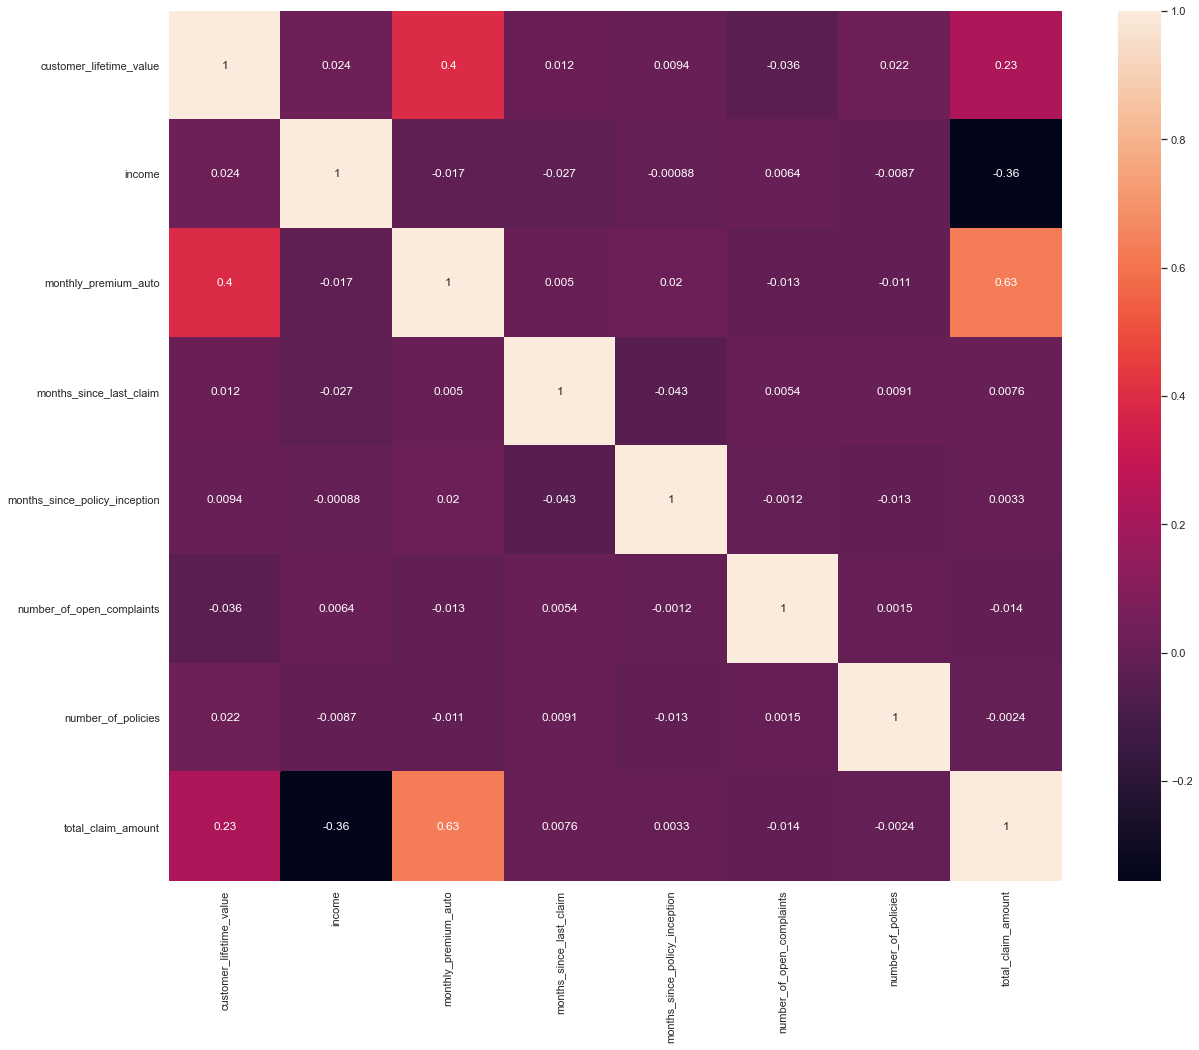

In [24]:
corr_matrix=numerical.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

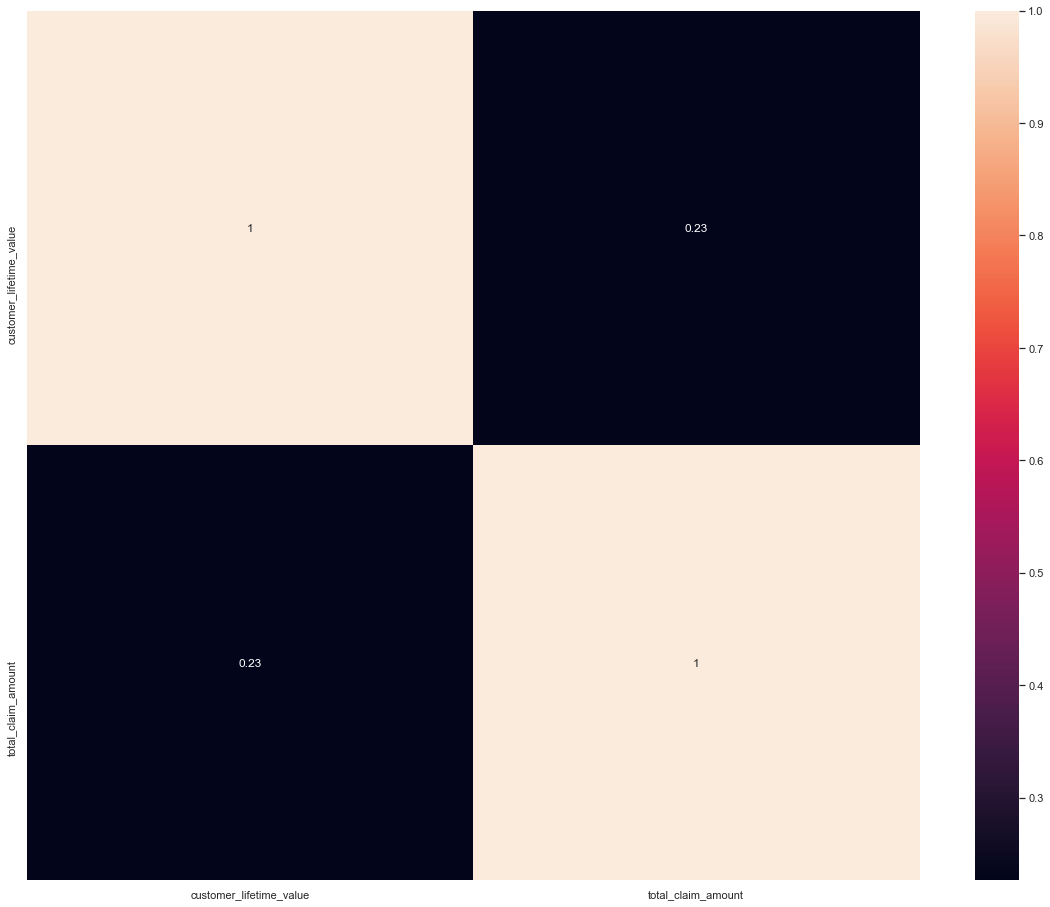

In [25]:
corr_matrix=continuous_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

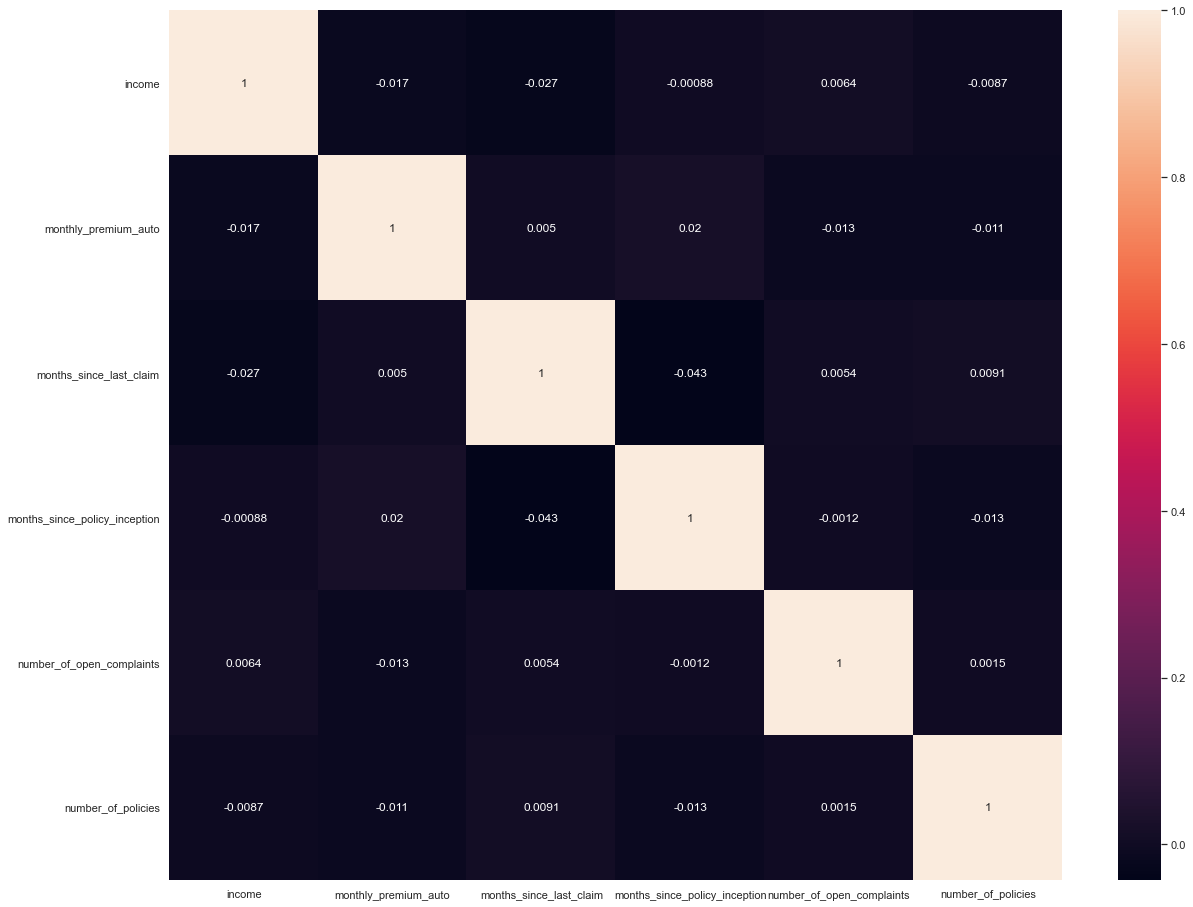

In [26]:
corr_matrix=discrete_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Q4) Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [27]:
def plot_df(df, plot_type):
    import matplotlib.pyplot as plt
    import seaborn as sns    

    if plot_type == 'displot':
        cols=list(df.columns)
    
        for col in cols:
            sns.distplot(df[col])
            plt.show()

    if plot_type == 'histplot':
        cols=list(df.columns)
    
        for col in cols:
            sns.histplot(df[col])
            plt.show()

    if plot_type == 'boxplot':
        cols=list(df.columns)
    
        for col in cols:
            sns.boxplot(df[col])
            plt.show()

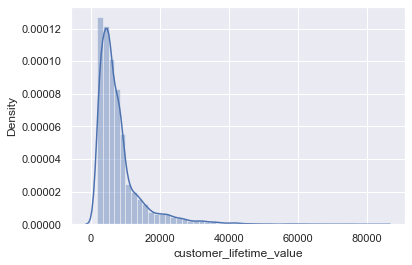

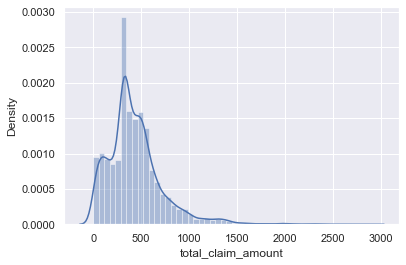

In [28]:
# continuous variables = distplot
plot_df(continuous_df,'displot')

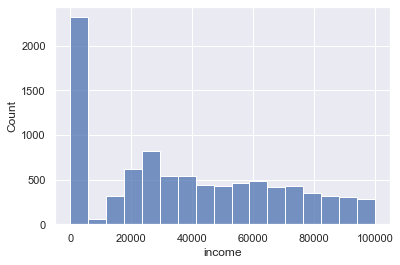

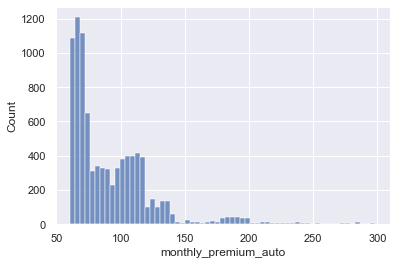

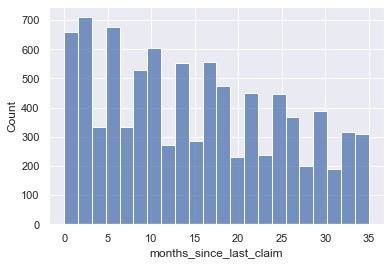

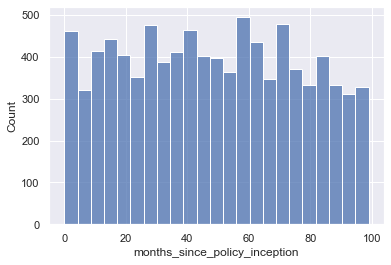

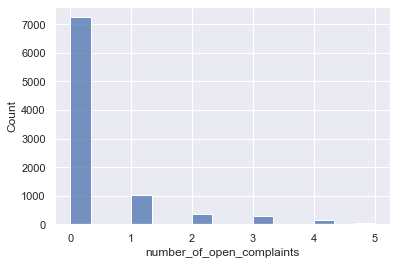

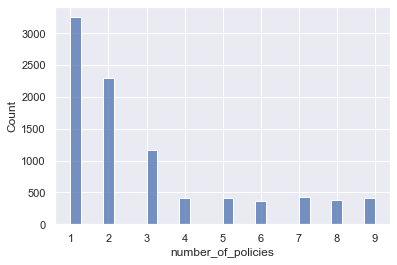

In [29]:
# discrete variables = histplot
plot_df(discrete_df,'histplot')

Q5) What can you see in the plots?
- scewness of continuous
- from discrete you can easily identify the grouped values


## Q6) Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

Q7) Have you found outliers? If you have, what should we do with them?


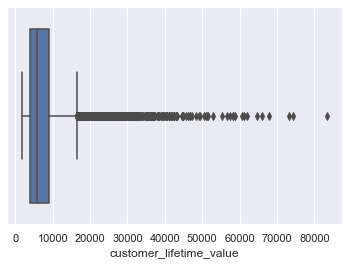

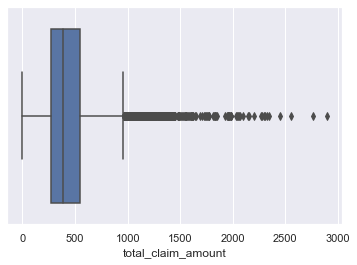

In [30]:
plot_df(continuous_df,'boxplot')

Q7) Have you found outliers? If you have, what should we do with them?
- Lots of outliers for customer lifetime value and total claim amount, so many that we didnt feel like they should be dropped
- Screwness > Log transformation

In [31]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

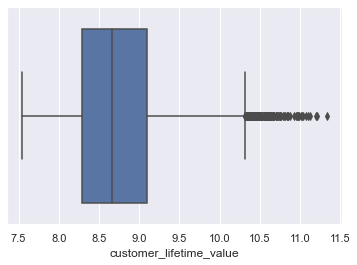

In [32]:
# Using the functions to check the distribution of transformed data

customer_df['customer_lifetime_value'] = list(map(log_transfom_clean_, customer_df['customer_lifetime_value']))



customer_df['customer_lifetime_value'] = customer_df['customer_lifetime_value'].fillna(np.mean(customer_df['customer_lifetime_value']))
sns.boxplot(customer_df['customer_lifetime_value'])
plt.show()


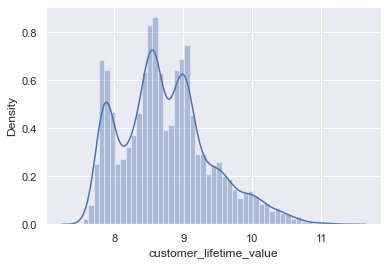

In [33]:
sns.distplot(customer_df['customer_lifetime_value'])
plt.show()

### Q8) Check nan values per column

In [34]:
continuous_df['customer_lifetime_value'].unique() 

array([ 2763.519279,  6979.535903, 12887.43165 , ...,  8163.890428,
        7524.442436,  2611.836866])

In [35]:
continuous_df['customer_lifetime_value'].isna().sum()

0

In [36]:
' 'in continuous_df['customer_lifetime_value']

False

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab 1. 02/02/21 | Feature extraction   ----------
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()

Plot all the categorical variables with the proper plot. What can you see?

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Plot time variable. Can you extract something from it?

In [37]:
import matplotlib.pyplot as plt

In [38]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [39]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Plot all the categorical variables with the proper plot. What can you see?

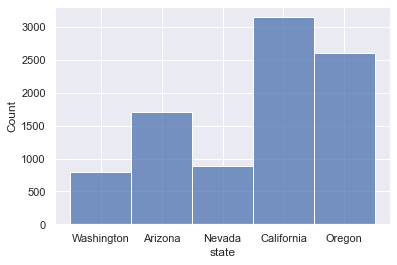

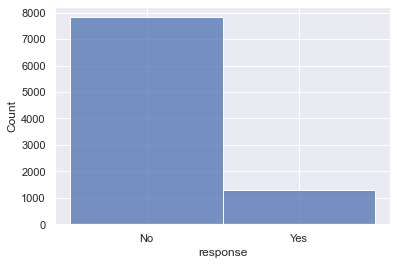

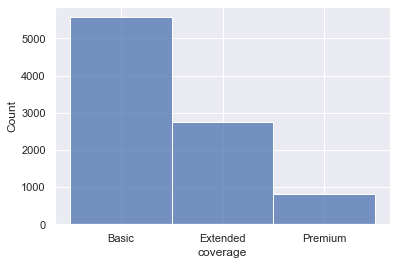

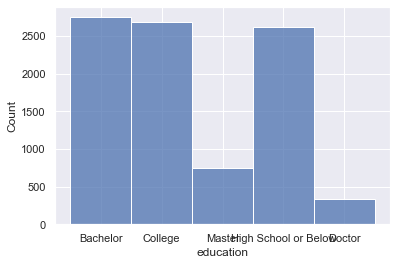

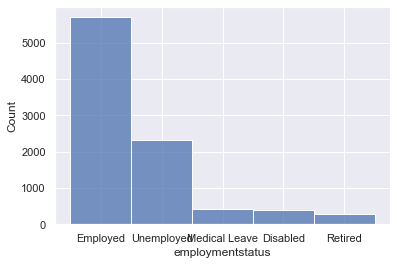

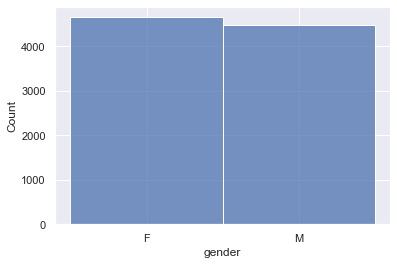

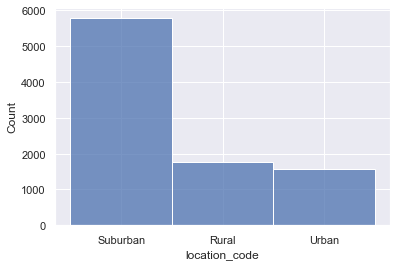

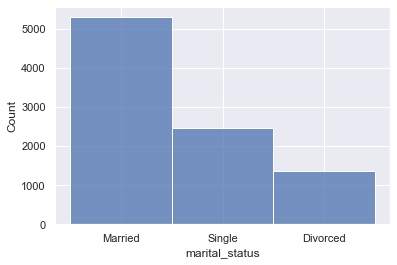

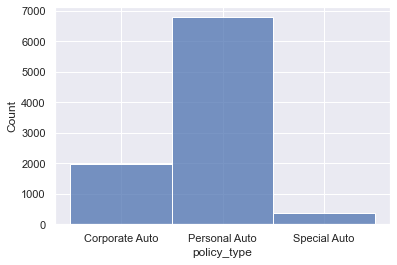

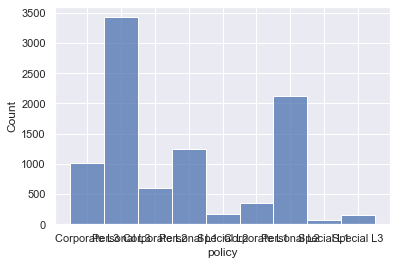

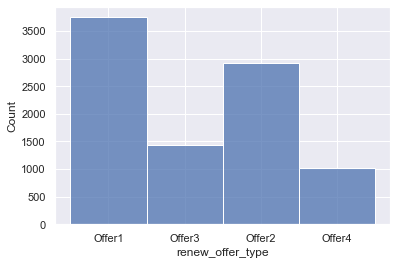

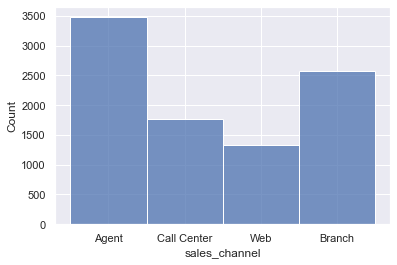

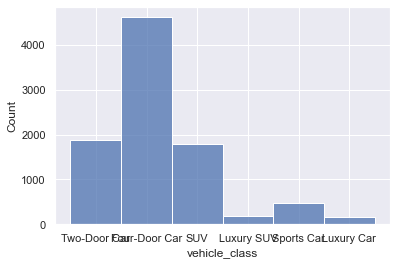

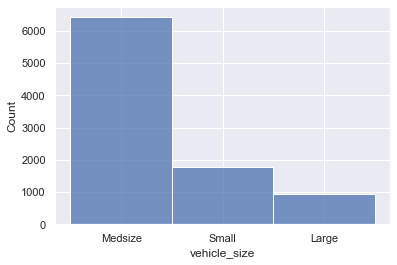

In [40]:
# CAT = Histplot
plot_df(categorical,'histplot')

#### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

*** EDUCATION X EMPLOYMENT - related?

In [41]:
data_crosstabEdEmp = pd.crosstab(categorical['education'], categorical['employmentstatus'], margins = False)
data_crosstabEdEmp

employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,121,1702,126,88,711
College,98,1664,145,102,672
Doctor,22,249,17,1,53
High School or Below,118,1528,115,72,789
Master,46,555,29,19,92


In [42]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstabEdEmp, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstabEdEmp.columns, index=data_crosstabEdEmp.index)

The Chi2 value is:  148.76
The p-value is:  1.3729369098070577e-23
The number of degrees of freedom is:  16
The expected frequencies are: 


employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,121.845851,1714.265820,129.968907,84.840815,697.078607
College,118.875082,1672.469674,126.800088,82.772279,680.082877
Doctor,15.164222,213.347493,16.175170,10.558791,86.754325
High School or Below,116.259032,1635.664112,124.009634,80.950734,665.116488
Master,32.855813,462.252901,35.046201,22.877381,187.967703


*** EMPLOYMENT x GENDER - sexism?

In [43]:
data_crosstabGenEmp = pd.crosstab(categorical['gender'], categorical['employmentstatus'], margins = False)
data_crosstabGenEmp

employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
gender,,,,,
F,244,2937,214,128,1135
M,161,2761,218,154,1182


In [44]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstabGenEmp, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstabGenEmp.columns, index=data_crosstabGenEmp.index)

The Chi2 value is:  22.22
The p-value is:  0.00018151136449675047
The number of degrees of freedom is:  4
The expected frequencies are: 


employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
gender,,,,,
F,206.534924,2905.7679,220.303919,143.809503,1181.583753
M,198.465076,2792.2321,211.696081,138.190497,1135.416247


## What we see: 

##### Plots:
that the majority of the cat data is ordinal


##### CH2

######### LOGIC: 
Let's use the usual confidence level of 95%.
Chi2 <-> Chi2_critical
if (Chi2 >= Chi2_critical):
    reject Ho
else:
    accept H0
***EDUCATION X EMPLOYMENT**
Chi 2 = 148.76 DOF = 16
The two-tailed P value is less than 0.05 (the complementary 5%) ch2. 148.76 > 26.30
148.76 > 26.30 (critical) = reject.
We reject the nul hypotheses columns education and employmentstatus are not related.
Decision: we can drop education as it has more columns



***EMPLOYMENT x GENDER - sexism?**
Chi 2 = 22.22 DOF = 4
The two-tailed P value is less than 0.05 (the complementary 5%) ch2. 22.22 > 	9.49
22.22 > 9.49 (critical) = reject.
We reject the nul hypotheses columns employment and gender are not related. = no sexism
Decision: we can drop employmentstatus

In [45]:
customer_df.drop(['employmentstatus', 'education'], axis=1, inplace= True)


### Effective_to_date

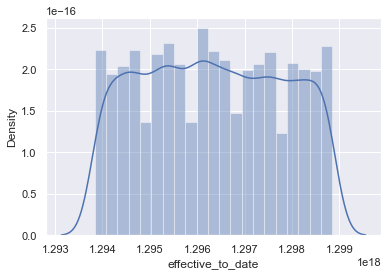

In [46]:
sns.distplot(customer_df['effective_to_date'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

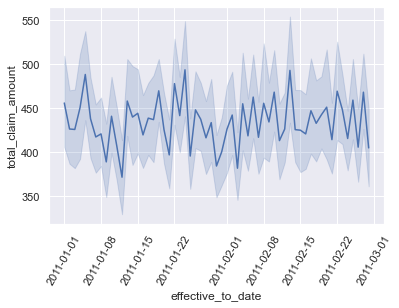

In [47]:
import seaborn as sns
sns.lineplot(x = 'effective_to_date', y = 'total_claim_amount', data = customer_df) 
plt.xticks(rotation=60)
plt.show

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)


# Lab 2. 02/02/21 | Data cleaning and wrangling  ------

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Create a copy of the dataframe for the data wrangling.

Normalize the continuous variables. You can use any one method you want.

Encode the categorical variables

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
 given that column "coverage" in the dataframe "data" has three categories:
 "basic", "extended", and "premium" and values are to be represented in the same order.

### Normalize the continuous variables. You can use any one method you want.

In [48]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(continuous_df)
x_normalized = transformer.transform(continuous_df)
x_normalized

array([[0.99044391, 0.13791612],
       [0.98711334, 0.16002269],
       [0.99903536, 0.043913  ],
       ...,
       [0.99534146, 0.0964125 ],
       [0.99580733, 0.09147549],
       [0.99013542, 0.14011367]])

### COPY of DF

In [49]:
#Attempt 1
encode_customer_df = customer_df.copy()
encode_customer_df

,state,customer_lifetime_value,response,coverage,effective_to_date,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,7.924260,No,Basic,2011-02-24,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,8.850738,No,Extended,2011-01-31,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,9.464008,No,Premium,2011-02-19,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,8.941920,No,Basic,2011-01-20,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,7.942253,No,Basic,2011-02-03,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,10.060747,No,Basic,2011-02-10,M,71941.0,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,8.038031,Yes,Extended,2011-02-12,F,21604.0,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,9.007476,No,Extended,2011-02-06,M,0.0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [50]:
customer_df['effective_to_date'] #BEFORE

customer_id
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
WW63253   2011-01-20
HB64268   2011-02-03
             ...    
LA72316   2011-02-10
PK87824   2011-02-12
TD14365   2011-02-06
UP19263   2011-02-03
Y167826   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [51]:
encode_customer_df["ts_effective_to_date"] = encode_customer_df["effective_to_date"].astype("int64")/1e9 # the division exclude milliseconds bringing it down to seconds
encode_customer_df["ts_effective_to_date"].iloc[1]


#customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(lambda x:x.toordinal()))---
encode_customer_df['effective_to_date'].dtype #AFTER

dtype('<M8[ns]')

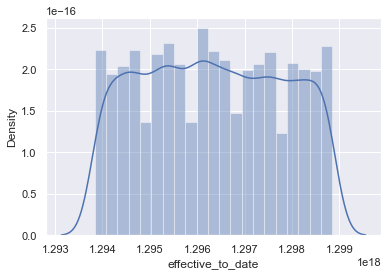

In [52]:
sns.distplot(encode_customer_df['effective_to_date'])
plt.show()

In [53]:
encode_customer_df.drop('effective_to_date', axis = 1, inplace = True) #########<<<<< NEED TO FIX

### Encode the categorical variables

In [54]:
categorical #BEFORE

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [55]:
def ordcat(encode_customer_df):
    cols=list(encode_customer_df)
    
    for col in cols:
        if ( col == 'location_code'):  
            location_dict = {'Suburban':0, 'Rural':1, 'Urban':2 }
            encode_customer_df['location_code'] = encode_customer_df.location_code.map(location_dict)
            print("location_code column ordinally encoded!")
            
        elif ( col == 'coverage'):  
            coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
            encode_customer_df['coverage'] = encode_customer_df.coverage.map(coverage_dict)
            print("coverage column ordinally encoded!")
            
        elif ( col == 'renew_offer_type'):  
            offer_dict = {'Offer1':1,'Offer2':2,'Offer3':3,'Offer4':4}
            encode_customer_df['renew_offer_type'] = encode_customer_df.renew_offer_type.map(offer_dict)
            print("renew_offer_type column ordinally encoded!")  
            
        elif ( col == 'vehicle_size'):  
            vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
            encode_customer_df['vehicle_size'] = encode_customer_df.vehicle_size.map(vehicle_dict)
            print("vehicle_size column ordinally encoded!") 
            
    return encode_customer_df
encode_customer_df = ordcat(encode_customer_df)

coverage column ordinally encoded!
location_code column ordinally encoded!
renew_offer_type column ordinally encoded!
vehicle_size column ordinally encoded!


In [56]:
encode_customer_df = pd.get_dummies(encode_customer_df,drop_first=True)
print("encode_customer_df encoded with dummies!") 

encode_customer_df encoded with dummies!


In [57]:
#categorial columns orginally came out [35], encorded categorical > 30 columns

In [58]:
encode_customer_df #AFTER

,customer_lifetime_value,coverage,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_size,ts_effective_to_date,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,0,56274.0,0,69,32,5,0,1,1,384.811147,1,1.298506e+09,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,8.850738,1,0.0,0,94,13,42,0,8,3,1131.464935,1,1.296432e+09,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AI49188,9.464008,2,48767.0,0,108,18,38,0,2,1,566.472247,1,1.298074e+09,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
WW63253,8.941920,0,0.0,0,106,18,65,0,7,1,529.881344,1,1.295482e+09,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
HB64268,7.942253,0,43836.0,1,73,12,44,0,1,1,138.130879,1,1.296691e+09,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,10.060747,0,71941.0,2,73,18,89,0,2,2,198.234764,1,1.297296e+09,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
PK87824,8.038031,1,21604.0,0,79,14,28,0,1,1,379.200000,1,1.297469e+09,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
TD14365,9.007476,1,0.0,0,85,9,37,3,2,1,790.784983,1,1.296950e+09,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Double - check. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [59]:
encode_customer_df.info() #ALL NUMERICAL :)

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   coverage                       9134 non-null   int64  
 2   income                         9134 non-null   float64
 3   location_code                  9134 non-null   int64  
 4   monthly_premium_auto           9134 non-null   int64  
 5   months_since_last_claim        9134 non-null   int64  
 6   months_since_policy_inception  9134 non-null   int64  
 7   number_of_open_complaints      9134 non-null   int64  
 8   number_of_policies             9134 non-null   int64  
 9   renew_offer_type               9134 non-null   int64  
 10  total_claim_amount             9134 non-null   float64
 11  vehicle_size                   9134 non-null   int64  
 12  ts_effective_to_date           9134 non-null

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab1. Comparing regression models 03-02-21

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

Q1) In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

Q2) Try a simple linear regression with all the data to see whether we are getting good results.

Q3) Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

Q4) Use the function to check LinearRegressor and KNeighborsRegressor.

Q5) You can check also the MLPRegressor for this task!
Check and discuss the results.

### Q3) Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [60]:
#Test MODEL 1
test1 = encode_customer_df.copy()
test1.head(3)

,customer_lifetime_value,coverage,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_size,ts_effective_to_date,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,0,56274.0,0,69,32,5,0,1,1,384.811147,1,1.298506e+09,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,8.850738,1,0.0,0,94,13,42,0,8,3,1131.464935,1,1.296432e+09,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AI49188,9.464008,2,48767.0,0,108,18,38,0,2,1,566.472247,1,1.298074e+09,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [61]:
#Test MODEL 2
test2 = encode_customer_df.copy()
test2.head(3)

,customer_lifetime_value,coverage,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_size,ts_effective_to_date,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,0,56274.0,0,69,32,5,0,1,1,384.811147,1,1.298506e+09,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,8.850738,1,0.0,0,94,13,42,0,8,3,1131.464935,1,1.296432e+09,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AI49188,9.464008,2,48767.0,0,108,18,38,0,2,1,566.472247,1,1.298074e+09,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [62]:
#Test MODEL 3
test3 = encode_customer_df.copy()
test3.head(3)

,customer_lifetime_value,coverage,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_size,ts_effective_to_date,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,0,56274.0,0,69,32,5,0,1,1,384.811147,1,1.298506e+09,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,8.850738,1,0.0,0,94,13,42,0,8,3,1131.464935,1,1.296432e+09,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AI49188,9.464008,2,48767.0,0,108,18,38,0,2,1,566.472247,1,1.298074e+09,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [63]:
#Test MODEL 4
test4 = encode_customer_df.copy()
test4.head(3)

,customer_lifetime_value,coverage,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_size,ts_effective_to_date,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,0,56274.0,0,69,32,5,0,1,1,384.811147,1,1.298506e+09,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,8.850738,1,0.0,0,94,13,42,0,8,3,1131.464935,1,1.296432e+09,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AI49188,9.464008,2,48767.0,0,108,18,38,0,2,1,566.472247,1,1.298074e+09,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


#### Q1) In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

#### Q2) Try a simple linear regression with all the data to see whether we are getting good results.

In [64]:
def model(data, column_to_drop, type_of_model, n_neighbors=4):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.metrics import r2_score
    from sklearn import linear_model
    X = data.drop([column_to_drop], axis=1) 
    y = data[column_to_drop]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    #LR
    if type_of_model == 'LinearRegressor': 
        lm = linear_model.LinearRegression()
        model = lm.fit(X_train,y_train)
        predictions  = lm.predict(X_test)
        sns.scatterplot(y = predictions, x = y_test)
        plt.show()
        print('Model used: LinearRegressor Model -- Target: ',column_to_drop)
        
    #KNN     
    elif type_of_model == 'KNeighborsRegressor':
        
        from sklearn.neighbors import KNeighborsRegressor
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors) 
        knn_model.fit(X_train, y_train)
        predictions = knn_model.predict(X_test)
        sns.scatterplot(y = predictions, x = y_test)
        plt.show()
        print('Model used: KNN Model -- Target: ',column_to_drop, ' -- Neighbors:', n_neighbors)
        
    #MLPRegressor
    elif type_of_model == 'MLPRegressor':
        from sklearn.neural_network import MLPRegressor
        from sklearn.datasets import make_regression
        mlp_model = MLPRegressor(hidden_layer_sizes=(100), alpha=1e-05, max_iter=10, activation="relu", random_state=1)
        mlp_model.fit(X_train, y_train)
        predictions = mlp_model.predict(X_test)
        sns.scatterplot(y = predictions, x = y_test)
        plt.show()
        print('Model used: MLPRegressor -- Target: ',column_to_drop, ' -- Neighbors:', n_neighbors)
        
        
    print("The mean absolute error of the model in the test set is: ", round(mean_absolute_error(y_test,predictions),3))
    print("The mean squared error of the model in the test set is: ", round(mean_squared_error(y_test,predictions),3))
    print("The root mean squared error of the model in the test set is: ", round(np.sqrt(mean_squared_error(y_test,predictions)),3))
    print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),3))

### TEST MODEL 1

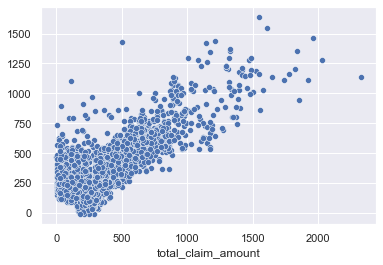

Model used: LinearRegressor Model -- Target:  total_claim_amount
The mean absolute error of the model in the test set is:  128.939
The mean squared error of the model in the test set is:  31273.765
The root mean squared error of the model in the test set is:  176.844
The R2 of the linear model is:  0.608


In [65]:
model(test1,'total_claim_amount', 'LinearRegressor')

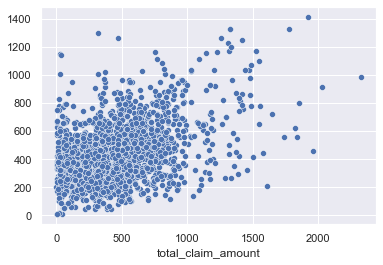

Model used: KNN Model -- Target:  total_claim_amount  -- Neighbors: 4
The mean absolute error of the model in the test set is:  181.157
The mean squared error of the model in the test set is:  66449.381
The root mean squared error of the model in the test set is:  257.778
The R2 of the linear model is:  0.168


In [66]:
model(test1,'total_claim_amount', 'KNeighborsRegressor', 4)

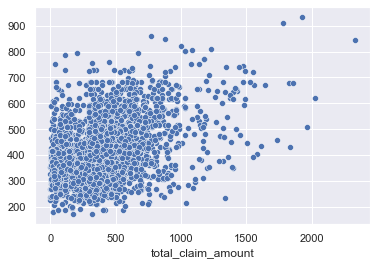

Model used: KNN Model -- Target:  total_claim_amount  -- Neighbors: 20
The mean absolute error of the model in the test set is:  189.536
The mean squared error of the model in the test set is:  67034.967
The root mean squared error of the model in the test set is:  258.911
The R2 of the linear model is:  0.16


In [67]:
model(test1,'total_claim_amount', 'KNeighborsRegressor', 20)

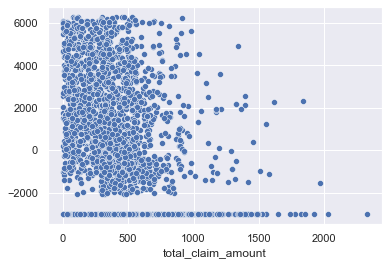

Model used: MLPRegressor -- Target:  total_claim_amount  -- Neighbors: 4
The mean absolute error of the model in the test set is:  2517.728
The mean squared error of the model in the test set is:  8694582.795
The root mean squared error of the model in the test set is:  2948.658
The R2 of the linear model is:  -107.908


In [68]:
model(test1,'total_claim_amount', 'MLPRegressor')

In [69]:
##model(encode_customer_df,'total_claim_amount', 'KNeighborsClassifier', 5)

### TEST MODEL 2, remove states

In [70]:
test2.drop(['state_Nevada', 'state_Oregon', 'state_Washington'], axis=1, inplace= True)

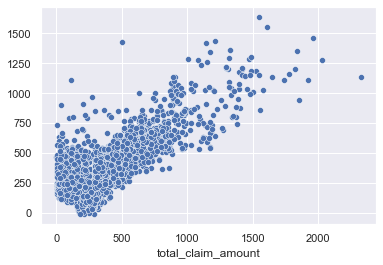

Model used: LinearRegressor Model -- Target:  total_claim_amount
The mean absolute error of the model in the test set is:  128.924
The mean squared error of the model in the test set is:  31274.169
The root mean squared error of the model in the test set is:  176.845
The R2 of the linear model is:  0.608


In [71]:
model(test2,'total_claim_amount', 'LinearRegressor')

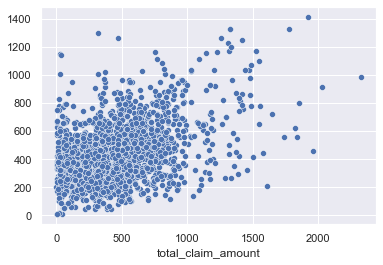

Model used: KNN Model -- Target:  total_claim_amount  -- Neighbors: 4
The mean absolute error of the model in the test set is:  181.182
The mean squared error of the model in the test set is:  66452.566
The root mean squared error of the model in the test set is:  257.784
The R2 of the linear model is:  0.168


In [72]:
model(test2,'total_claim_amount', 'KNeighborsRegressor', 4)

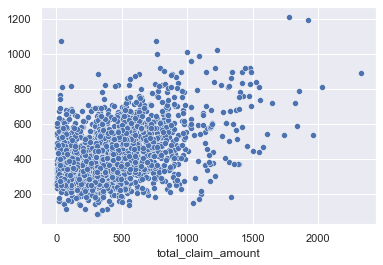

Model used: KNN Model -- Target:  total_claim_amount  -- Neighbors: 10
The mean absolute error of the model in the test set is:  185.548
The mean squared error of the model in the test set is:  64430.263
The root mean squared error of the model in the test set is:  253.831
The R2 of the linear model is:  0.193


In [73]:
model(test2,'total_claim_amount', 'KNeighborsRegressor', 10)

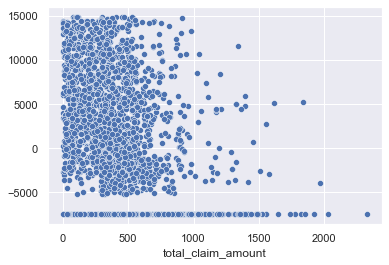

Model used: MLPRegressor -- Target:  total_claim_amount  -- Neighbors: 4
The mean absolute error of the model in the test set is:  5905.46
The mean squared error of the model in the test set is:  48203364.884
The root mean squared error of the model in the test set is:  6942.864
The R2 of the linear model is:  -602.795


In [74]:
model(test2,'total_claim_amount', 'MLPRegressor')

### TEST MODEL 3, change target: 'monthly_premium_auto'

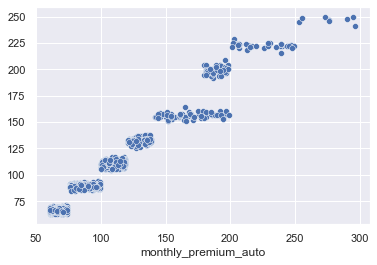

Model used: LinearRegressor Model -- Target:  monthly_premium_auto
The mean absolute error of the model in the test set is:  5.035
The mean squared error of the model in the test set is:  46.145
The root mean squared error of the model in the test set is:  6.793
The R2 of the linear model is:  0.959


In [75]:
model(test3,'monthly_premium_auto', 'LinearRegressor')

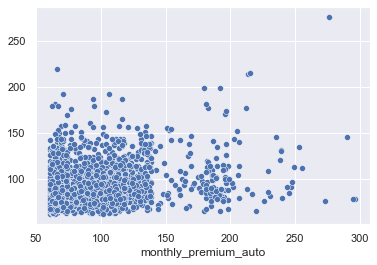

Model used: KNN Model -- Target:  monthly_premium_auto  -- Neighbors: 4
The mean absolute error of the model in the test set is:  23.028
The mean squared error of the model in the test set is:  1151.091
The root mean squared error of the model in the test set is:  33.928
The R2 of the linear model is:  -0.024


In [76]:
model(test3,'monthly_premium_auto', 'KNeighborsRegressor')

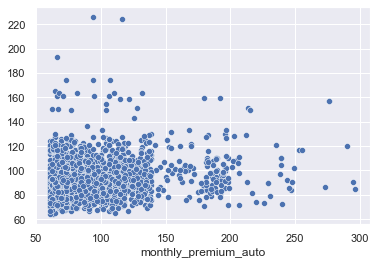

Model used: KNN Model -- Target:  monthly_premium_auto  -- Neighbors: 10
The mean absolute error of the model in the test set is:  24.044
The mean squared error of the model in the test set is:  1128.894
The root mean squared error of the model in the test set is:  33.599
The R2 of the linear model is:  -0.004


In [77]:
model(test3,'monthly_premium_auto', 'KNeighborsRegressor', 10)

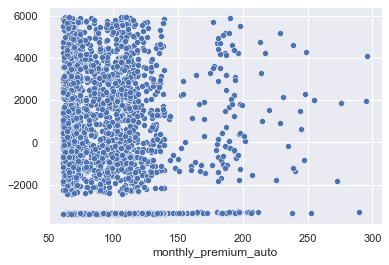

Model used: MLPRegressor -- Target:  monthly_premium_auto  -- Neighbors: 4
The mean absolute error of the model in the test set is:  2424.954
The mean squared error of the model in the test set is:  8010921.677
The root mean squared error of the model in the test set is:  2830.357
The R2 of the linear model is:  -7126.626


In [78]:
model(test3,'monthly_premium_auto', 'MLPRegressor')

### TEST MODEL 4, change target: 'monthly_premium_auto' & drop states

In [79]:
test4.drop(['state_Nevada', 'state_Oregon', 'state_Washington'], axis=1, inplace= True)

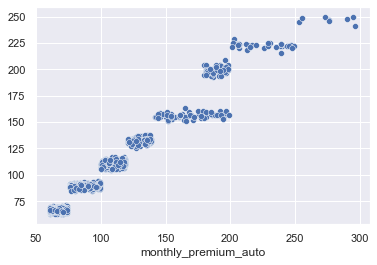

Model used: LinearRegressor Model -- Target:  monthly_premium_auto
The mean absolute error of the model in the test set is:  5.035
The mean squared error of the model in the test set is:  46.165
The root mean squared error of the model in the test set is:  6.794
The R2 of the linear model is:  0.959


In [80]:
model(test4,'monthly_premium_auto', 'LinearRegressor')

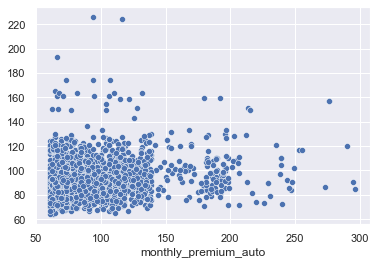

Model used: KNN Model -- Target:  monthly_premium_auto  -- Neighbors: 10
The mean absolute error of the model in the test set is:  24.044
The mean squared error of the model in the test set is:  1128.894
The root mean squared error of the model in the test set is:  33.599
The R2 of the linear model is:  -0.004


In [81]:
model(test4,'monthly_premium_auto', 'KNeighborsRegressor', 10)

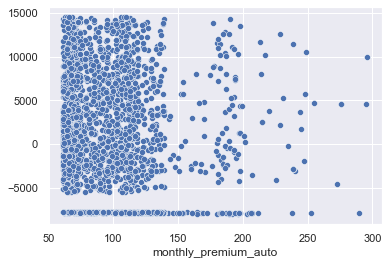

Model used: MLPRegressor -- Target:  monthly_premium_auto  -- Neighbors: 4
The mean absolute error of the model in the test set is:  5829.401
The mean squared error of the model in the test set is:  46909270.465
The root mean squared error of the model in the test set is:  6849.034
The R2 of the linear model is:  -41735.99


In [82]:
model(test4,'monthly_premium_auto', 'MLPRegressor')